<a href="https://colab.research.google.com/github/kundanpandit/DATA_MINING_PRACTICALS/blob/main/Practical_1_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_table("people.txt",sep=" ")
df

,AGE,AGEGROUP,HEIGHT,STATUS,YEARSMARRIED
0,21,ADULT,6.0,SINGLE,-1
1,2,CHILD,3.0,MARRIED,0
2,18,ADULT,5.7,MARRIED,20
3,221,ELDERLY,5.0,WIDOWED,2
4,34,CHILD,-7.0,MARRIED,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AGE           5 non-null      int64  
 1   AGEGROUP      5 non-null      object 
 2   HEIGHT        5 non-null      float64
 3   STATUS        5 non-null      object 
 4   YEARSMARRIED  5 non-null      int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 328.0+ bytes


In [ ]:
df.describe()

,AGE,HEIGHT,YEARSMARRIED
count,5.000000,5.00000,5.000000
mean,59.200000,2.54000,4.800000
std,91.163041,5.45967,8.642916
min,2.000000,-7.00000,-1.000000
25%,18.000000,3.00000,0.000000
50%,21.000000,5.00000,2.000000
75%,34.000000,5.70000,3.000000
max,221.000000,6.00000,20.000000


In [ ]:
isAgeInValid = (df['AGE'] > 0) & (df['AGE'] < 150)
isAgeInValid

0     True
1     True
2     True
3    False
4     True
Name: AGE, dtype: bool

In [ ]:
invalidStatus = ((df['STATUS'] == 'SINGLE') | (df['STATUS'] == 'MARRIED')|(df['STATUS'] == 'WIDOWED'))
invalidStatus


0    True
1    True
2    True
3    True
4    True
Name: STATUS, dtype: bool

In [ ]:
Invalidagegroup = ((df['AGE'] < 18) & (df['AGEGROUP'] == 'CHILD'))|((df['AGE'] >= 18) & (df['AGE'] < 65) & (df['AGEGROUP'] == 'ADULT'))|((df['AGE'] >= 65) & (df['AGEGROUP'] == 'ELDERLY'))
Invalidagegroup

0     True
1     True
2     True
3     True
4    False
dtype: bool

In [ ]:
invalidYearsMarried = df['AGE'] > df['YEARSMARRIED']
invalidYearsMarried


0     True
1     True
2    False
3     True
4     True
dtype: bool

In [ ]:
invalidData = {
'isAgeValid' : len(df) - isAgeInValid.sum(),
'YearMarried' : len(df) - invalidYearsMarried.sum(),
'Status' : len(df) - invalidStatus.sum(),
'AgeGroup' : len(df) - Invalidagegroup.sum()
}

In [ ]:
invalidData

{'isAgeValid': 1, 'YearMarried': 1, 'Status': 0, 'AgeGroup': 1}

In [ ]:
df1 = pd.DataFrame(data=pd.Series(invalidData) , columns=['count'])
df1

,count
isAgeValid,1
YearMarried,1
Status,0
AgeGroup,1


In [ ]:
df1.describe()

,count
count,4.00
mean,0.75
std,0.50
min,0.00
25%,0.75
50%,1.00
75%,1.00
max,1.00


<Axes: >

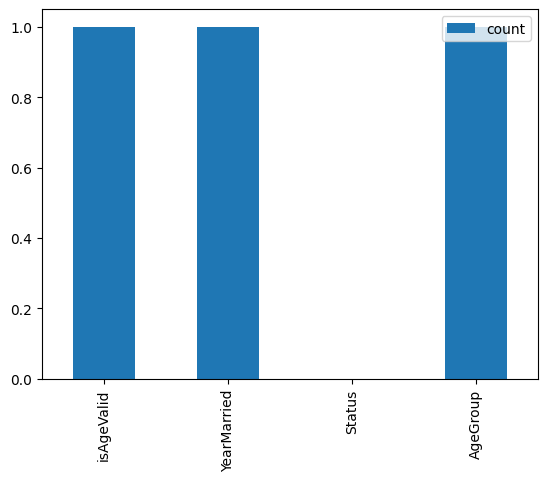

In [ ]:
df1.plot.bar()


In [ ]:
def ruleset(df):
 df["Rule1"]=df["AGE"].apply(lambda x: True if x>0 and x<150 else False)
 df["Rule2"]=df.apply(lambda x:True if x.AGE>x.yearsmarried else False,axis=1)
 df["Rule3"]=df.apply(lambda x:True if (x.STATUS=="SINGLE")|(x.STATUS=="MARRIED" and x.AGE>18)|(x.STATUS=="WIDOWED" and x.AGE>18) else False,axis=1)
 df['Rule4']=df.apply(lambda x: True if (x.AGE<18 and x.AGEGROUP=='child')|((x.AGE>=18 and x.AGE<65) and x.AGEGROUP=='ADULT' ) | (x.AGE>65 and x.AGEGROUP == 'ELDERLY') else False, axis=1)


In [ ]:
df["Rule1"]

0     True
1     True
2     True
3    False
4     True
Name: Rule1, dtype: bool